In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_random_numbers():
    """
    Genera datos de entrenamiento aleatorios basados en una función seno con ruido.
    
    Returns:
        x_values (numpy.ndarray): Valores de entrada (features) entre 0 y 1.
        y_values (numpy.ndarray): Valores de salida (targets) con ruido aplicado.
    """
    x_values = np.random.uniform(0.0, 1.0, size = (100, 1))
    noise = np.random.uniform(-0.3, 0.3, size = (100, 1))
    y_values = np.sin(2 * np.pi * x_values) + noise
    return x_values, y_values

In [4]:
def sgd(x_values, y_values, alpha = 0.01, epochs = 1000, degree = 3):
    """
    Implementa el Descenso de Gradiente Estocástico (SGD) para regresión polinomial.
    
    Args:
        x_values (numpy.ndarray): Datos de entrada.
        y_values (numpy.ndarray): Datos de salida (objetivo).
        alpha (float): Tasa de aprendizaje.
        epochs (int): Número de iteraciones sobre todo el conjunto de datos.
        degree (int): Grado del polinomio para la regresión.
        
    Returns:
        theta (numpy.ndarray): Pesos aprendidos del modelo.
        costs_history (list): Historial del costo por cada época.
    """
    m = len(x_values)
    costs_history = []
    
    # Preparación de características polinomiales
    x_poly = np.ones((m, 1))
    for d in range(1, degree + 1):
        x_poly = np.c_[x_poly, np.power(x_values, d)]
    
    # Inicialización aleatoria de pesos (theta)
    dim = x_poly.shape[1]
    theta = np.random.uniform(-0.5, 0.5, size = (dim, 1))
    
    for epoch in range(epochs):
        # Barajar los datos en cada época
        indices = np.random.permutation(m)
        x_poly_shuffled = x_poly[indices]
        y_shuffled = y_values[indices]
        
        for i in range(m):
            xi = x_poly_shuffled[i:i+1]
            yi = y_shuffled[i:i+1]
            # Predicción y cálculo del error
            prediction = xi.dot(theta)
            error = yi - prediction
            # Cálculo del gradiente y actualización de pesos
            gradient = xi.T.dot(error)
            theta += alpha * gradient
            
        # Calcular el costo de la época actual
        predictions = x_poly.dot(theta)
        cost = np.sum(np.square(y_values - predictions)) / (2 * m)
        costs_history.append(cost)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: cost = {cost}")
    return theta, costs_history

In [3]:
X, y = generate_random_numbers()

In [18]:
theta_final, cost_history = sgd(X, y, degree=6)

Epoch 0: cost = 0.2574213043575783
Epoch 100: cost = 0.0950913245713933
Epoch 200: cost = 0.08367130890100327
Epoch 300: cost = 0.07446150790508053
Epoch 400: cost = 0.06666313402990363
Epoch 500: cost = 0.06022881107720188
Epoch 600: cost = 0.055036152509835665
Epoch 700: cost = 0.05031226424009449
Epoch 800: cost = 0.046592081257000734
Epoch 900: cost = 0.04338596308601427


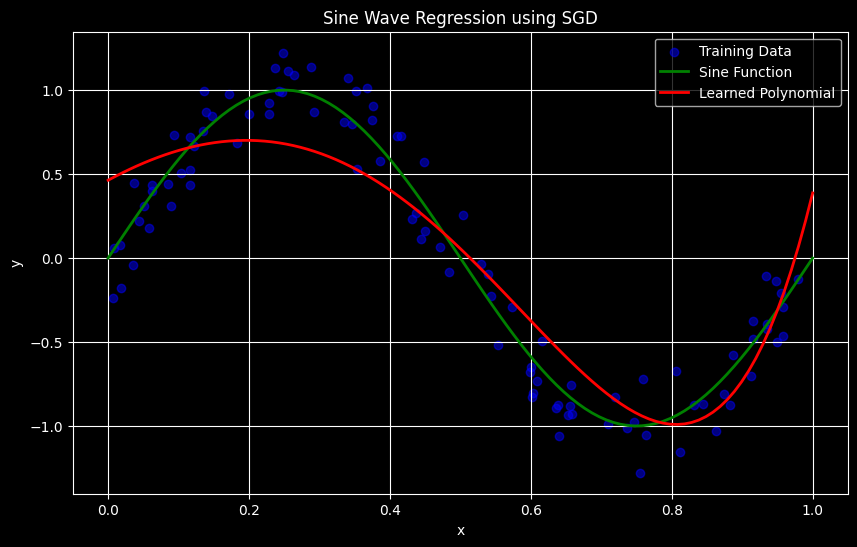

In [19]:
# Visualización de los resultados
x_test = np.linspace(0, 1, 100).reshape(-1, 1)
y_sine = np.sin(2 * np.pi * x_test)

# Preparar características polinomiales para el conjunto de prueba
x_test_poly = np.ones((len(x_test), 1))
degree = theta_final.shape[0] - 1
for d in range(1, degree + 1):
    x_test_poly = np.c_[x_test_poly, np.power(x_test, d)]
y_learned = x_test_poly.dot(theta_final)

# Creación de la gráfica
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos de Entrenamiento', alpha=0.5)
plt.plot(x_test, y_sine, color='green', label='Función Seno Real', linewidth=2)
plt.plot(x_test, y_learned, color='red', label='Polinomio Aprendido', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión de Onda Senoidal usando SGD')
plt.legend()
plt.grid(True)
plt.show()
